Imports


In [1]:

import math
import sys

import random 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Tree print function

In [2]:
def tree_to_dataframe(node, level=0, parent_prefix="Root"):
    data = {
        "Level": [level],
        "Parent": [parent_prefix],
        "Value": [node.value],
        "Count": [node.count],
        "Wins":[node.wins],
        "Player": [node.player],
        "State": [node.state],
        
    }
    df = pd.DataFrame(data)

    for child in node.children:
        child_df = tree_to_dataframe(child, level + 1, f"{parent_prefix} -> {node.value}-{node.count}")
        df = pd.concat([df, child_df], ignore_index=True)

    return df

def save_tree_to_excel(node, filename="tree.xlsx"):
    df = tree_to_dataframe(node)
    df.to_excel(filename, index=False)

In [3]:
def print_tree(node, level=0, prefix="Root: "):
    if node is not None:
        print("  " * level + prefix + f"Value: {node.value}, Count: {node.count}, Player: {node.player}, Parent:{node.parent}")
        print("  " * level + f"State:\n{node.state}\n")

        for child in node.children:
            print_tree(child, level + 1, "Child: ")

Tree definition 

In [4]:

class Node:
    def __init__(self, value,count,wins,player,parent,state=None):
        self.value = value
        self.count = count
        self.wins = wins
        self.player = player
        self.children = []
        self.parent = parent
        self.state = state if state is not None else pd.DataFrame(0, index=range(6), columns=range(7))
    def add_children(self, children):
        self.children.append(children)

initial_state = pd.DataFrame({
    0: [0, 0, 0, 0, 0, 0],
    1: [0, 0, 0, 0, 1, 0],
    2: [0, 0, 0, 0, 1, 0],
    3: [0, 0, 0, 0, 1, 0],
    4: [0, 0, 0, 0, 1, 0],
    5: [0, 0, 0, 0, 0, 0],
    6: [0, 0, 0, 0, 0, 0]
})    


CPU_player=1        
root = Node(1,100,1,2,None,initial_state)
# print_tree(root)



Backpropagation


In [5]:
def backpropagation(node, winner):
    node.count =node.count+1
    # print("El nodo actual es:",node.value)
    if winner == CPU_player:
        node.wins += 1 
    elif winner != CPU_player:
        if(winner==0):
            node.wins +=0.5
        else:
            node.wins -= 1
            
    node.value=node.wins/node.count
    if node.parent is not None:
        backpropagation(node.parent, winner)
    
    
    

Simulation


In [6]:
def check_winner2(board,player=None):
    
       
        for player in [1, 2]:
            
            for row in range(6):
                for col in range(4):
                    if all(board.iloc[row, col + i] == player for i in range(4)):
                        return False

            for row in range(3):
                for col in range(7):
                    if all(board.iloc[row + i, col] == player for i in range(4)):
                        return False

            for row in range(3):
                for col in range(4):
                    if all(board.iloc[row + i, col + i] == player for i in range(4)):
                        return False

            for row in range(3):
                for col in range(3, 7):
                    if all(board.iloc[row + i, col - i] == player for i in range(4)):
                        return False

        return True






# def check_winner(board,player=None):
    
#         for row in range(6):
#             for col in range(4):
#                 if all(board.iloc[row, col + i] == player for i in range(4)):
#                     return True

#         for row in range(3):
#             for col in range(7):
#                 if all(board.iloc[row + i, col] == player for i in range(4)):
#                     return True

#         for row in range(3):
#             for col in range(4):
#                 if all(board.iloc[row + i, col + i] == player for i in range(4)):
#                     return True

#         for row in range(3):
#             for col in range(3, 7):
#                 if all(board.iloc[row + i, col - i] == player for i in range(4)):
#                     return True

#         return False



def check_winner(data,player):
    # Convertir el DataFrame de pandas a una matriz de numpy
    matrix = data.to_numpy()

    # Verificar horizontalmente
    for i in range(6):
        if check_consecutive_ones(matrix[i, :],player):
            return True

    for i in range(7):
        if  check_consecutive_ones(matrix[:, i],player):
            return True

    # Verificar diagonalmente
    for i in range(-2, 4):
        if check_consecutive_ones(np.diagonal(matrix, offset=i),player):
            return True
        if check_consecutive_ones(np.diagonal(np.fliplr(matrix), offset=i),player):
            return True
    
    return False

def check_consecutive_ones(array,player):
    # Verificar si hay cuatro unos consecutivos en el array
    
    str_array = ''.join(map(str, array))
    return '1111' in str_array if player == 1 else ('2222' in str_array if player == 2 else False)





def generate_possible_states(current_state, current_player):
    possible_states = []
    
    for col in range(7):
        if check_winner(current_state,current_player):
            break
        if current_state.iloc[0, col] == 0:
            new_state = current_state.copy()
            
            for row in range(5, -1, -1):
                if new_state.iloc[row, col] == 0:
                    if current_player == 1:
                        new_state.iloc[row, col] = 2
                    elif current_player == 2:
                        new_state.iloc[row, col] = 1
                    possible_states.append(new_state.copy())
                    
                    break
       

    return possible_states                                                                                                                                                                                                                                                                                                                                                                                         




def is_valid_move(state, column):
        return state.iloc[0, column] == 0


def make_move(state, column, player):
        if is_valid_move(state,column):
            for row in range(5, -1, -1):
                if state.iloc[row, column] == 0:
                    state.iloc[row, column] = player
                    return True
        
        return False
# def make_move(state, column, player):
#     if is_valid_move(state, column):
#         for row in range(5, -1, -1):
#             if state.at[row, column] == 0:
#                 state.at[row, column] = player
#                 return True
#     return False





def play_random_game(node):
    current_state= node.state.copy()
    current_player = node.player
    while True:
        valid_moves = [col for col in range(7) if is_valid_move(current_state,col)]
        if not valid_moves:
            # print("Tablero lleno. Empate.")
            return 0

        column = random.choice(valid_moves)
        if make_move(current_state,column, current_player):
            
            if check_winner(current_state, current_player):
                return current_player
            else:
                current_player = 3 - current_player

print(play_random_game(root))





1


In [7]:
def simulation(node):
    
    play_result=play_random_game(node)
    if(play_result==1):
        backpropagation(node,1)
    elif(play_result==2):
        backpropagation(node,2)
    elif(play_result==0):
        backpropagation(node,0)
    

Expansion


In [8]:
count_nodes = 0

def expansion(node):
    
    global count_nodes
    if not node.children:
        
        for state_node in generate_possible_states(node.state,node.player):
            next_player = 3 - node.player
            count_nodes += 1
            new_node = Node(0,0,0,next_player, node, state_node)
            node.add_children(new_node)
            variable_name = 'Node_' + str(count_nodes)
            globals()[variable_name] = new_node

Backup


Selection

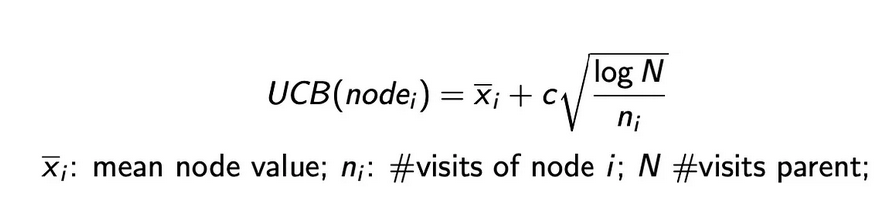

In [9]:
def selection(node):
    max_node = None
    epsilon = sys.float_info.epsilon
    max_UCB = float('-inf')
    parent_count = node.count 
    c_alpha=10
    
    if node.children:
        for child in node.children:
            child_count = child.count 
            child_value = child.value
            child_UCB=0

            if child_count == 0:
                child_UCB= child_value + (c_alpha * math.sqrt(math.log(parent_count) / epsilon))
            else:
                child_UCB = child_value + (c_alpha * math.sqrt(math.log(parent_count) / child_count))
            
            
            
            if child_UCB > max_UCB:
                max_UCB = child_UCB
                max_node = child
        selection(max_node)
        
    else:
        
        simulation(node)
        expansion(node)
        
        


In [10]:
# specific_node = root  


# for i in range(1000):
#     selection(specific_node)

# def print_max(node):
#     child_max=float('-inf')
#     child_max_state= pd.DataFrame(0, index=range(6), columns=range(7))
#     for child in node.children:
#         if child.count>child_max:
#             child_max_state=child.state
#             child_max=child.count
#     return(child_max_state)

In [11]:
# save_tree_to_excel(root)

In [12]:
# print_max(root)
colors = {0: 'white', 1: 'red', 2: 'yellow'}

# Función para dibujar el tablero
def draw_board(board):
    fig, ax = plt.subplots()
    ax.set_aspect('equal')

    for i, row in enumerate(board.values):
        for j, cell in enumerate(row):
            circle = plt.Circle((j + 0.5, 5.5 - i), 0.4, color=colors[cell], ec='black')
            ax.add_patch(circle)

    ax.set_xlim(0, 7)
    ax.set_ylim(0, 6)
    ax.set_xticks(range(1, 8))
    ax.set_yticks(range(1, 7))  # Ajustar según el número de filas en tu juego
    ax.set_xticklabels([])
    ax.set_yticklabels(list(board.index)[::-1])  # Mostrar índices en eje y
    ax.set_frame_on(False)

    plt.show()

# Dibujar el tablero

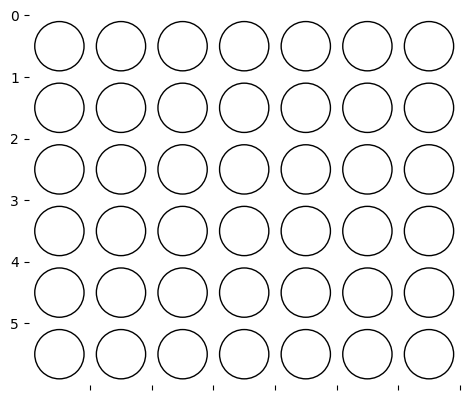

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Crear un DataFrame de ejemplo
data = {'C1': [0, 0, 0, 0, 0, 0],
        'C2': [0, 0, 0, 0, 0, 0],
        'C3': [0, 0, 0, 0, 0, 0],
        'C4': [0, 0, 0, 0, 0, 0],
        'C5': [0, 0, 0, 0, 0, 0],
        'C6': [0, 0, 0, 0, 0, 0],
        'C7': [0, 0, 0, 0, 0, 0]}

df = pd.DataFrame(data)

# Definir colores para representar las fichas
colors = {0: 'white', 1: 'red', 2: 'yellow'}

# Función para dibujar el tablero
def draw_board(board):
    fig, ax = plt.subplots()
    ax.set_aspect('equal')

    for i, row in enumerate(board.values):
        for j, cell in enumerate(row):
            circle = plt.Circle((j + 0.5, 5.5 - i), 0.4, color=colors[cell], ec='black')
            ax.add_patch(circle)

    ax.set_xlim(0, 7)
    ax.set_ylim(0, 6)
    ax.set_xticks(range(1, 8))
    ax.set_yticks(range(1, 7))  # Ajustar según el número de filas en tu juego
    ax.set_xticklabels([])
    ax.set_yticklabels(list(board.index)[::-1])  # Mostrar índices en eje y
    ax.set_frame_on(False)

    plt.show()

# Dibujar el tablero
draw_board(df)


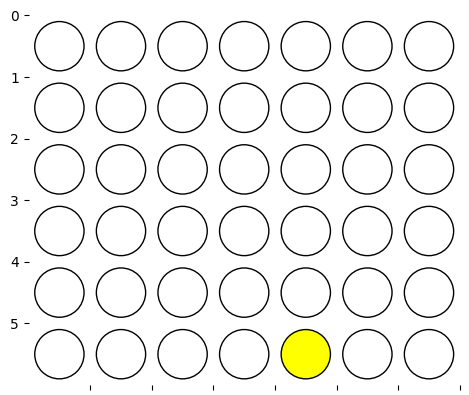

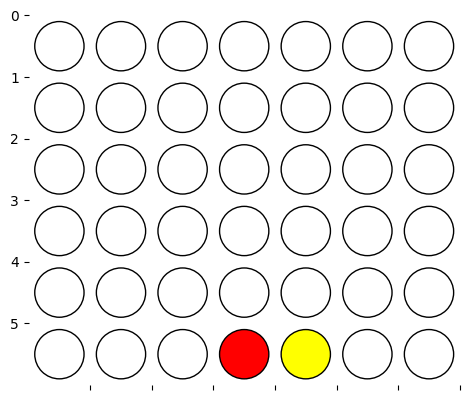

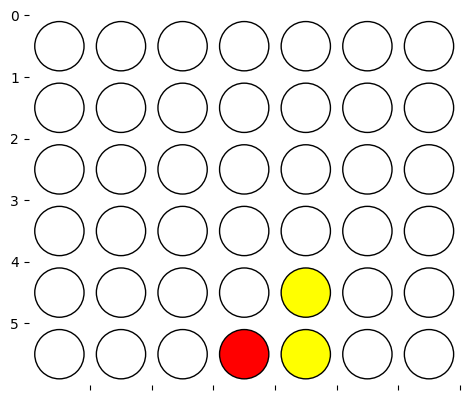

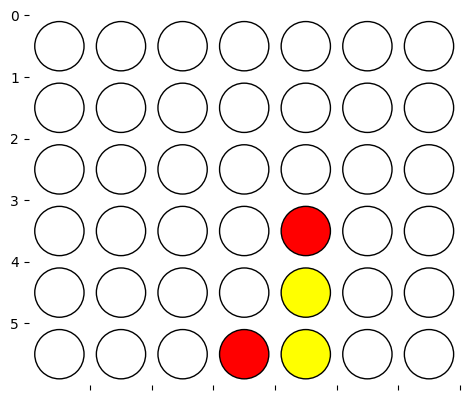

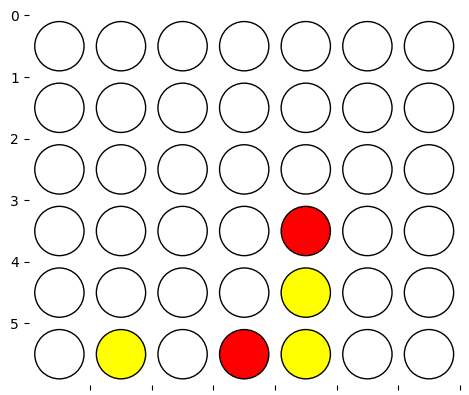

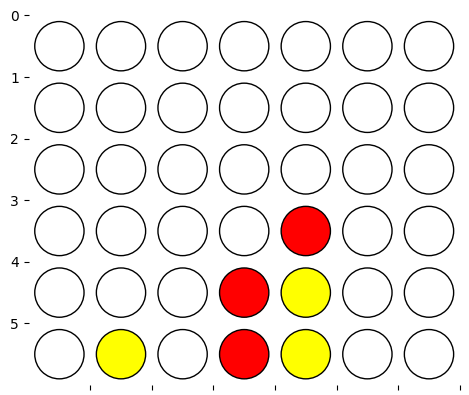

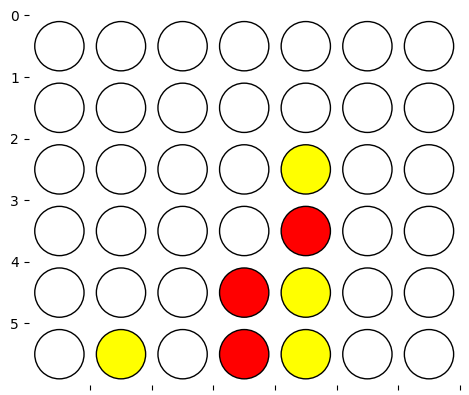

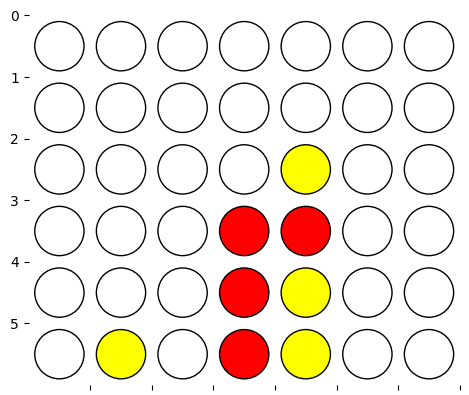

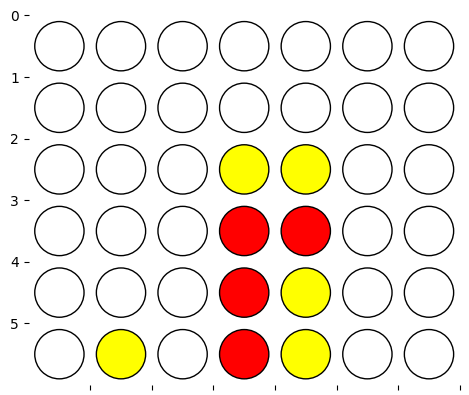

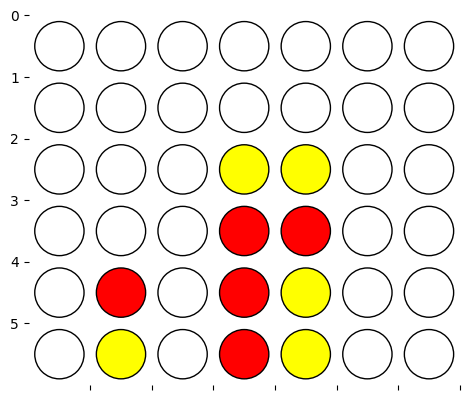

ValueError: invalid literal for int() with base 10: ''

In [14]:

import pandas as pd


n_iterations=1000

def cpu_play(root_state):

    global root
    root = Node(1,100,1,2,None,root_state)
    child_max=float('-inf')
    child_max_state= pd.DataFrame(0, index=range(6), columns=range(7))

    for i in range(n_iterations):
        selection(root)
    
    for child in root.children:
        if child.count>child_max:
            child_max_state=child.state
            child_max=child.count
    return(child_max_state)    
        
def play_game():
    first_player=2
    initial_state = pd.DataFrame({
    0: [0, 0, 0, 0, 0, 0],
    1: [0, 0, 0, 0, 0, 0],
    2: [0, 0, 0, 0, 0, 0],
    3: [0, 0, 0, 0, 0, 0],
    4: [0, 0, 0, 0, 0, 0],
    5: [0, 0, 0, 0, 0, 0],
    6: [0, 0, 0, 0, 0, 0]
    })
    play_state=initial_state
    while True:
        if first_player==1:
            initial_state=cpu_play(initial_state)
            draw_board(initial_state)
            first_player=2
        elif first_player==2:    
            player_input=int(input("Ingrese una columna del 0 al 6"))
            play_validation=make_move(initial_state,player_input,2)

            if(play_validation):
                first_player=1
                draw_board(initial_state)
            else:
                print("Jugada no valida, seleccione otra columna")
                



play_game()

In [ ]:


# def cpu_vs_cpu():
#     first_player=2
#     initial_state = pd.DataFrame({
#     0: [0, 0, 0, 0, 0, 0],
#     1: [0, 0, 0, 0, 0, 0],
#     2: [0, 0, 0, 0, 0, 0],
#     3: [0, 0, 0, 0, 0, 0],
#     4: [0, 0, 0, 0, 0, 0],
#     5: [0, 0, 0, 0, 0, 0],
#     6: [0, 0, 0, 0, 0, 0]
#     })
#     wins_1=0
#     wins_2=0
#     c_alfa_1=10
#     c_alfa_2=11
#     for i in range(100):

#         while True:
#             if first_player==1:
#                 if check_winner2(initial_state):
#                     wins_2+=1
#                     break
#                 else:
#                     initial_state=cpu_play(initial_state,c_alfa_1,1)
#                     print("CPU:")

#                     draw_board(initial_state)
#                     first_player=2
#             elif first_player==2:
#                 if check_winner2(initial_state):
#                     wins_1+=1
#                     break
#                 else:    
#                     initial_state=cpu_play(initial_state,c_alfa_2,2)
#                     print("CPU:")
#                     draw_board(initial_state)
#                     first_player=1
#     print(wins_1,wins_2)
# cpu_vs_cpu()
# play_game()
